In [107]:
!pip install openpyxl
!pip install tabulate
import openpyxl
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from tabulate import tabulate

In [129]:
#Reading and Cleaning Data 
df_excel1 = pd.read_excel('../input/elkram/municipalite kram janvier 2021.xlsx')
df_excel1.columns = df_excel1.columns.str.replace(' ','')
data1 = pd.DataFrame(df_excel1, columns=['Vehicule','PoidsNet'])

df_excel2 = pd.read_excel('../input/elkram/municipalite kram fevrier 2021.xlsx')
df_excel2.columns = df_excel2.columns.str.replace(' ','')
data2 = pd.DataFrame(df_excel2, columns=['Vehicule','PoidsNet'])

df_excel3 = pd.read_excel('../input/elkram/municipalite kram mars 2021.xlsx')
df_excel3.columns = df_excel3.columns.str.replace(' ','')
data3 = pd.DataFrame(df_excel3, columns=['Vehicule','PoidsNet'])

df_excel4 = pd.read_excel('../input/elkram/municipalite kram avril 2021.xlsx')
df_excel4.columns = df_excel4.columns.str.replace(' ','')
data4 = pd.DataFrame(df_excel4, columns=['Vehicule','PoidsNet'])

df_excel5 = pd.read_excel('../input/elkram/municipalite kram mai 2021.xlsx')
df_excel5.columns = df_excel5.columns.str.replace(' ','')
data5 = pd.DataFrame(df_excel5, columns=['Vehicule','PoidsNet'])

df_excel6 = pd.read_excel('../input/elkram/municipalite kram juin 2021.xlsx')
df_excel6.columns = df_excel6.columns.str.replace(' ','')
data6 = pd.DataFrame(df_excel6, columns=['Vehicule','PoidsNet'])

df_excel7 = pd.read_excel('../input/elkram/municipalite kram juillet 2021.xlsx')
df_excel7.columns = df_excel7.columns.str.replace(' ','')
data7 = pd.DataFrame(df_excel7, columns=['Vehicule','PoidsNet'])

df_excel8 = pd.read_excel('../input/elkram/municipalite kram aout 2021.xlsx')
df_excel8.columns = df_excel8.columns.str.replace(' ','')
data8 = pd.DataFrame(df_excel8, columns=['Vehicule','PoidsNet'])

df_excel9 = pd.read_excel('../input/elkram/municipalite kram septembre 2021.xlsx')
df_excel9.columns = df_excel9.columns.str.replace(' ','')
data9 = pd.DataFrame(df_excel9, columns=['Vehicule','PoidsNet'])

df_excel10 = pd.read_excel('../input/elkram/municipalite kram octobre 2021.xlsx')
df_excel10.columns = df_excel10.columns.str.replace(' ','')
data10 = pd.DataFrame(df_excel10, columns=['Vehicule','PoidsNet'])

df_excel11 = pd.read_excel('../input/elkram/municipalite kram novembre 2021.xlsx')
df_excel11.columns = df_excel11.columns.str.replace(' ','')
datan = pd.DataFrame(df_excel11, columns=['Vehicule','PoidsNet'])

df_excel12 = pd.read_excel('../input/elkram/municipalite kram decembre 2021.xlsx')
df_excel12.columns = df_excel12.columns.str.replace(' ','')
datad = pd.DataFrame(df_excel12, columns=['Vehicule','PoidsNet'])

In [130]:
data1.replace(' ','')
data1['Vehicule']=data1['Vehicule'].str.lower()
data11=data1[data1['Vehicule']=='47tn6633']
JRSPN47tn6633=data11['PoidsNet'].sum()

data12=data1[data1['Vehicule']=='186tn4530']
JBMSPN186tn4530=data12['PoidsNet'].sum()

data13=data1[data1['Vehicule']=='201tn1136']
JBMSPN201tn1136=data13['PoidsNet'].sum()

data14=data1[data1['Vehicule']=='23tu5649']
JTEPN23tu5649=data14['PoidsNet'].sum()

data17=data1[data1['Vehicule']=='108 tu5710']
JTEPN108tu5710 =data17['PoidsNet'].sum()

data16=data1[data1['Vehicule']=='121tn1402']
JSSPN121tn1402=data16['PoidsNet'].sum()

data18=data1[data1['Vehicule']=='108tn101']
JSSPN108tn101=data18['PoidsNet'].sum()
list_janvier=[JRSPN47tn6633,JBMSPN186tn4530,JBMSPN201tn1136,JTEPN23tu5649,JTEPN108tu5710,JSSPN121tn1402,JSSPN108tn101]

col_names = ["Vehicule","Janvier", "Février","Mars","Avril","Mai","Juin","Juillet","Aout","Septembre","Octobre","Novembre","Décembre"]
table = pd.DataFrame(columns = col_names)
table["Vehicule"]=['RS-47tn6633','BMS-186tn4530','BMS-201tn1136','TE-23tu5649','TE-108tu5710','SS-121tn1402','SS-108tn101']
table["Janvier"]=list_janvier




In [131]:
data2.replace(' ','')
data2['Vehicule']=data2['Vehicule'].str.lower()
data21=data2[data2['Vehicule']=='47tn6633']
FRSPN47tn6633=data21['PoidsNet'].sum()

data22=data2[data2['Vehicule']=='186tn4530']
FBMSPN186tn4530=data22['PoidsNet'].sum()

data23=data2[data2['Vehicule']=='201tn1136']
FBMSPN201tn1136=data23['PoidsNet'].sum()

data24=data2[data2['Vehicule']=='23tu5649']
FTEPN23tu5649=data24['PoidsNet'].sum()

data27=data2[data2['Vehicule']=='108 tu5710']
FTEPN108tu5710 =data27['PoidsNet'].sum()

data26=data2[data2['Vehicule']=='121tn1402']
FSSPN121tn1402=data26['PoidsNet'].sum()

data28=data2[data2['Vehicule']=='108tn101']
FSSPN108tn101=data28['PoidsNet'].sum()
list_février=[FRSPN47tn6633,FBMSPN186tn4530,FBMSPN201tn1136,FTEPN23tu5649,FTEPN108tu5710,FSSPN121tn1402,FSSPN108tn101]
table["Février"]=list_février


In [132]:

data3.replace(' ','')
data3['Vehicule']=data1['Vehicule'].str.lower()
data31=data3[data3['Vehicule']=='47tn6633']
MRSPN47tn6633=data31['PoidsNet'].sum()

data32=data3[data3['Vehicule']=='186tn4530']
MBMSPN186tn4530=data32['PoidsNet'].sum()

data33=data3[data3['Vehicule']=='201tn1136']
MBMSPN201tn1136=data33['PoidsNet'].sum()

data34=data3[data3['Vehicule']=='23tu5649']
MTEPN23tu5649=data34['PoidsNet'].sum()

data37=data3[data3['Vehicule']=='108 tu5710']
MTEPN108tu5710 =data37['PoidsNet'].sum()

data36=data3[data3['Vehicule']=='121tn1402']
MSSPN121tn1402=data36['PoidsNet'].sum()

data38=data3[data3['Vehicule']=='108tn101']
MSSPN108tn101=data38['PoidsNet'].sum()
list_mars=[MRSPN47tn6633,MBMSPN186tn4530,MBMSPN201tn1136,MTEPN23tu5649,MTEPN108tu5710,MSSPN121tn1402,MSSPN108tn101]
table["Mars"]=list_mars



In [133]:
data4.replace(' ','')
data4['Vehicule']=data4['Vehicule'].str.lower()
data41=data4[data4['Vehicule']=='47tn6633']
ARSPN47tn6633=data41['PoidsNet'].sum()

data42=data4[data4['Vehicule']=='186tn4530']
ABMSPN186tn4530=data42['PoidsNet'].sum()

data43=data4[data4['Vehicule']=='201tn1136']
ABMSPN201tn1136=data43['PoidsNet'].sum()

data44=data4[data4['Vehicule']=='23tu5649']
ATEPN23tu5649=data44['PoidsNet'].sum()

data47=data4[data4['Vehicule']=='108 tu5710']
ATEPN108tu5710 =data47['PoidsNet'].sum()

data46=data4[data4['Vehicule']=='121tn1402']
ASSPN121tn1402=data46['PoidsNet'].sum()

data48=data4[data4['Vehicule']=='108tn101']
ASSPN108tn101=data48['PoidsNet'].sum()
list_avril=[ARSPN47tn6633,ABMSPN186tn4530,ABMSPN201tn1136,ATEPN23tu5649,ATEPN108tu5710,ASSPN121tn1402, ASSPN108tn101]
table["Avril"]=list_avril



In [134]:
data5.replace(' ','')
data5['Vehicule']=data5['Vehicule'].str.lower()
data51=data5[data5['Vehicule']=='47tn6633']
MaiRSPN47tn6633=data51['PoidsNet'].sum()

data52=data5[data5['Vehicule']=='186tn4530']
MaiBMSPN186tn4530=data52['PoidsNet'].sum()

data53=data5[data5['Vehicule']=='201tn1136']
MaiBMSPN201tn1136=data53['PoidsNet'].sum()

data54=data5[data5['Vehicule']=='23tu5649']
MaiTEPN23tu5649=data54['PoidsNet'].sum()

data57=data5[data5['Vehicule']=='108 tu5710']
MaiTEPN108tu5710 =data57['PoidsNet'].sum()

data56=data5[data5['Vehicule']=='121tn1402']
MaiSSPN121tn1402=data56['PoidsNet'].sum()

data58=data5[data5['Vehicule']=='108tn101']
MaiSSPN108tn101=data58['PoidsNet'].sum()
list_mai=[MaiRSPN47tn6633,MaiBMSPN186tn4530,MaiBMSPN201tn1136,MaiTEPN23tu5649,MaiTEPN108tu5710,MaiSSPN121tn1402, MaiSSPN108tn101]
table["Mai"]=list_mai


In [135]:
data6.replace(' ','')
data6['Vehicule']=data5['Vehicule'].str.lower()
data61=data6[data6['Vehicule']=='47tn6633']
JuinRSPN47tn6633=data61['PoidsNet'].sum()

data62=data6[data6['Vehicule']=='186tn4530']
JuinBMSPN186tn4530=data62['PoidsNet'].sum()

data63=data6[data6['Vehicule']=='201tn1136']
JuinBMSPN201tn1136=data63['PoidsNet'].sum()

data64=data6[data6['Vehicule']=='23tu5649']
JuinTEPN23tu5649=data64['PoidsNet'].sum()

data67=data6[data6['Vehicule']=='108 tu5710']
JuinTEPN108tu5710 =data67['PoidsNet'].sum()

data66=data6[data6['Vehicule']=='121tn1402']
JuinSSPN121tn1402=data66['PoidsNet'].sum()

data68=data5[data5['Vehicule']=='108tn101']
JuinSSPN108tn101=data68['PoidsNet'].sum()
list_juin=[JuinRSPN47tn6633,JuinBMSPN186tn4530,JuinBMSPN201tn1136,JuinTEPN23tu5649,JuinTEPN108tu5710,JuinSSPN121tn1402, JuinSSPN108tn101]
table["Juin"]=list_juin


In [136]:
data7.replace(' ','')
data7['Vehicule']=data5['Vehicule'].str.lower()
data71=data7[data7['Vehicule']=='47tn6633']
JuillRSPN47tn6633=data71['PoidsNet'].sum()

data72=data7[data7['Vehicule']=='186tn4530']
JuillBMSPN186tn4530=data72['PoidsNet'].sum()

data73=data7[data7['Vehicule']=='201tn1136']
JuillBMSPN201tn1136=data73['PoidsNet'].sum()

data74=data7[data7['Vehicule']=='23tu5649']
JuillTEPN23tu5649=data74['PoidsNet'].sum()

data77=data7[data7['Vehicule']=='108 tu5710']
JuillTEPN108tu5710 =data77['PoidsNet'].sum()

data76=data7[data7['Vehicule']=='121tn1402']
JuillSSPN121tn1402=data76['PoidsNet'].sum()

data78=data7[data7['Vehicule']=='108tn101']
JuillSSPN108tn101=data78['PoidsNet'].sum()

list_juill=[JuillRSPN47tn6633,JuillBMSPN186tn4530,JuillBMSPN201tn1136,JuillTEPN23tu5649,JuillTEPN108tu5710,JuillSSPN121tn1402, JuillSSPN108tn101]
table["Juillet"]=list_juill



In [137]:
data7.replace(' ','')
data7['Vehicule']=data5['Vehicule'].str.lower()
data71=data7[data7['Vehicule']=='47tn6633']
JuillRSPN47tn6633=data71['PoidsNet'].sum()

data72=data7[data7['Vehicule']=='186tn4530']
JuillBMSPN186tn4530=data72['PoidsNet'].sum()

data73=data7[data7['Vehicule']=='201tn1136']
JuillBMSPN201tn1136=data73['PoidsNet'].sum()

data74=data7[data7['Vehicule']=='23tu5649']
JuillTEPN23tu5649=data74['PoidsNet'].sum()

data77=data7[data7['Vehicule']=='108 tu5710']
JuillTEPN108tu5710 =data77['PoidsNet'].sum()

data76=data7[data7['Vehicule']=='121tn1402']
JuillSSPN121tn1402=data76['PoidsNet'].sum()

data78=data7[data7['Vehicule']=='108tn101']
JuillSSPN108tn101=data78['PoidsNet'].sum()

list_juill=[JuillRSPN47tn6633,JuillBMSPN186tn4530,JuillBMSPN201tn1136,JuillTEPN23tu5649,JuillTEPN108tu5710,JuillSSPN121tn1402, JuillSSPN108tn101]
table["Juillet"]=list_juill



In [138]:
data8.replace(' ','')
data8['Vehicule']=data8['Vehicule'].str.lower()
data81=data8[data8['Vehicule']=='47tn6633']
AoutRSPN47tn6633=data81['PoidsNet'].sum()

data82=data8[data8['Vehicule']=='186tn4530']
AoutBMSPN186tn4530=data82['PoidsNet'].sum()

data83=data8[data8['Vehicule']=='201tn1136']
AoutBMSPN201tn1136=data83['PoidsNet'].sum()

data84=data8[data8['Vehicule']=='23tu5649']
AoutTEPN23tu5649=data84['PoidsNet'].sum()

data87=data8[data8['Vehicule']=='108 tu5710']
AoutTEPN108tu5710 =data87['PoidsNet'].sum()

data86=data8[data8['Vehicule']=='121tn1402']
AoutSSPN121tn1402=data86['PoidsNet'].sum()

data88=data8[data8['Vehicule']=='108tn101']
AoutSSPN108tn101=data88['PoidsNet'].sum()

list_aout=[AoutRSPN47tn6633,AoutBMSPN186tn4530,AoutBMSPN201tn1136,AoutTEPN23tu5649,AoutTEPN108tu5710,AoutSSPN121tn1402, AoutSSPN108tn101]
table["Aout"]=list_aout


In [139]:
data9.replace(' ','')
data9['Vehicule']=data9['Vehicule'].str.lower()
data91=data9[data9['Vehicule']=='47tn6633']
SRSPN47tn6633=data91['PoidsNet'].sum()

data92=data9[data9['Vehicule']=='186tn4530']
SBMSPN186tn4530=data92['PoidsNet'].sum()

data93=data9[data9['Vehicule']=='201tn1136']
SBMSPN201tn1136=data93['PoidsNet'].sum()

data94=data9[data9['Vehicule']=='23tu5649']
STEPN23tu5649=data94['PoidsNet'].sum()

data97=data9[data9['Vehicule']=='108 tu5710']
STEPN108tu5710 =data97['PoidsNet'].sum()

data96=data9[data9['Vehicule']=='121tn1402']
SSSPN121tn1402=data96['PoidsNet'].sum()

data98=data9[data9['Vehicule']=='108tn101']
SSSPN108tn101=data98['PoidsNet'].sum()

list_sep=[SRSPN47tn6633,SBMSPN186tn4530,SBMSPN201tn1136,STEPN23tu5649,STEPN108tu5710,SSSPN121tn1402, SSSPN108tn101]
table["Septembre"]=list_sep


In [140]:
data10.replace(' ','')
data10['Vehicule']=data10['Vehicule'].str.lower()
data101=data10[data10['Vehicule']=='47tn6633']
ORSPN47tn6633=data101['PoidsNet'].sum()

data102=data10[data10['Vehicule']=='186tn4530']
OBMSPN186tn4530=data102['PoidsNet'].sum()

data103=data10[data10['Vehicule']=='201tn1136']
OBMSPN201tn1136=data103['PoidsNet'].sum()

data104=data10[data10['Vehicule']=='23tu5649']
OTEPN23tu5649=data104['PoidsNet'].sum()

data107=data10[data10['Vehicule']=='108 tu5710']
OTEPN108tu5710 =data107['PoidsNet'].sum()

data106=data10[data10['Vehicule']=='121tn1402']
OSSPN121tn1402=data106['PoidsNet'].sum()

data108=data10[data10['Vehicule']=='108tn101']
OSSPN108tn101=data108['PoidsNet'].sum()
list_octobre=[ORSPN47tn6633,OBMSPN186tn4530,OBMSPN201tn1136,OTEPN23tu5649,OTEPN108tu5710,OSSPN121tn1402,OSSPN108tn101]

table["Octobre"]=list_octobre


In [142]:
datan.replace(' ','')
datan['Vehicule']=datan['Vehicule'].str.lower()
data111=datan[datan['Vehicule']=='47tn6633']
NRSPN47tn6633=data111['PoidsNet'].sum()

data112=datan[datan['Vehicule']=='186tn4530']
NBMSPN186tn4530=data112['PoidsNet'].sum()

data113=datan[datan['Vehicule']=='201tn1136']
NBMSPN201tn1136=data113['PoidsNet'].sum()

data114=datan[datan['Vehicule']=='23tu5649']
NTEPN23tu5649=data114['PoidsNet'].sum()

data117=datan[datan['Vehicule']=='108 tu5710']
NTEPN108tu5710 =data117['PoidsNet'].sum()

data116=datan[datan['Vehicule']=='121tn1402']
NSSPN121tn1402=data116['PoidsNet'].sum()

data118=datan[datan['Vehicule']=='108tn101']
NSSPN108tn101=data118['PoidsNet'].sum()
list_novembre=[NRSPN47tn6633,NBMSPN186tn4530,NBMSPN201tn1136,NTEPN23tu5649,NTEPN108tu5710,NSSPN121tn1402,NSSPN108tn101]

table["Novembre"]=list_novembre


In [143]:
datad.replace(' ','')
datad['Vehicule']=datad['Vehicule'].str.lower()
data121=datad[datad['Vehicule']=='47tn6633']
DRSPN47tn6633=data121['PoidsNet'].sum()

data122=datad[datad['Vehicule']=='186tn4530']
DBMSPN186tn4530=data122['PoidsNet'].sum()

data123=datad[datad['Vehicule']=='201tn1136']
DBMSPN201tn1136=data123['PoidsNet'].sum()

data124=datad[datad['Vehicule']=='23tu5649']
DTEPN23tu5649=data124['PoidsNet'].sum()

data127=datad[datad['Vehicule']=='108 tu5710']
DTEPN108tu5710 =data127['PoidsNet'].sum()

data126=datad[datad['Vehicule']=='121tn1402']
DSSPN121tn1402=data126['PoidsNet'].sum()

data128=datad[datad['Vehicule']=='108tn101']
DSSPN108tn101=data128['PoidsNet'].sum()
list_décembre=[DRSPN47tn6633,DBMSPN186tn4530,DBMSPN201tn1136,DTEPN23tu5649,DTEPN108tu5710,DSSPN121tn1402,DSSPN108tn101]

table["Décembre"]=list_décembre
table


,Vehicule,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Décembre
0,RS-47tn6633,2920.0,2180.0,29360.0,820.0,860.0,17440.0,3660.0,1620.0,1520.0,1100.0,1940.0,2220.0
1,BMS-186tn4530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,580.0,1220.0,240.0
2,BMS-201tn1136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TE-23tu5649,1080.0,0.0,1420.0,2080.0,2640.0,5020.0,25680.0,16160.0,16320.0,8700.0,6920.0,3200.0
4,TE-108tu5710,1120.0,0.0,9060.0,1080.0,0.0,0.0,0.0,6260.0,6740.0,5480.0,6840.0,4700.0
5,SS-121tn1402,260.0,560.0,3040.0,280.0,580.0,8840.0,9380.0,520.0,0.0,840.0,760.0,0.0
6,SS-108tn101,8440.0,6180.0,15580.0,10340.0,10980.0,10980.0,26060.0,19020.0,13960.0,10520.0,12060.0,17240.0


In [146]:
table['PN-Moyen']=table.mean(axis=1)
table

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Vehicule,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Décembre,PN-Moyen
0,RS-47tn6633,2920.0,2180.0,29360.0,820.0,860.0,17440.0,3660.0,1620.0,1520.0,1100.0,1940.0,2220.0,5470.000000
1,BMS-186tn4530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,580.0,1220.0,240.0,170.000000
2,BMS-201tn1136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,TE-23tu5649,1080.0,0.0,1420.0,2080.0,2640.0,5020.0,25680.0,16160.0,16320.0,8700.0,6920.0,3200.0,7435.000000
4,TE-108tu5710,1120.0,0.0,9060.0,1080.0,0.0,0.0,0.0,6260.0,6740.0,5480.0,6840.0,4700.0,3440.000000
5,SS-121tn1402,260.0,560.0,3040.0,280.0,580.0,8840.0,9380.0,520.0,0.0,840.0,760.0,0.0,2088.333333
6,SS-108tn101,8440.0,6180.0,15580.0,10340.0,10980.0,10980.0,26060.0,19020.0,13960.0,10520.0,12060.0,17240.0,13446.666667


<AxesSubplot:title={'center':'Poids Net Moyen par Véhicule pour 2021'}, ylabel='PN-Moyen'>

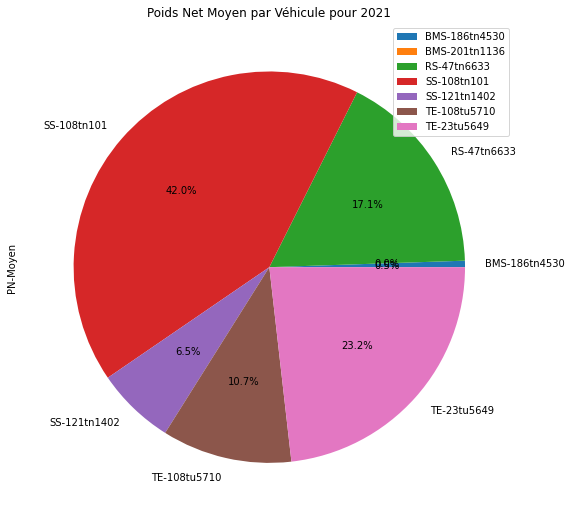

In [156]:
table.groupby(['Vehicule']).sum().plot(kind='pie', y='PN-Moyen',title='Poids Net Moyen par Véhicule pour 2021',autopct='%1.1f%%',figsize=(9, 9))
